Exercise 1: Multivariate regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Calculus import Calculus

In [2]:
data = np.genfromtxt('../A2_datasets/GPUbenchmark.csv', delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [3]:
c = Calculus()

1. Start by normalizing X using Xn = (X - mu) / sigma

In [4]:
mu, sigma, Xn = c.feature_normalization(X)

In [5]:
# extension
Xe_n = c.extended_matrix(Xn)

2. Multivariate datasets are hard to visualize. However, to get a basic understanding it might be a good idea to produce a plot Xi vs y for each one of the features. Use subplot(2,3,i) to fit all six plots into a single figure. Make sure that each nomalized Xi is centralized around zero.

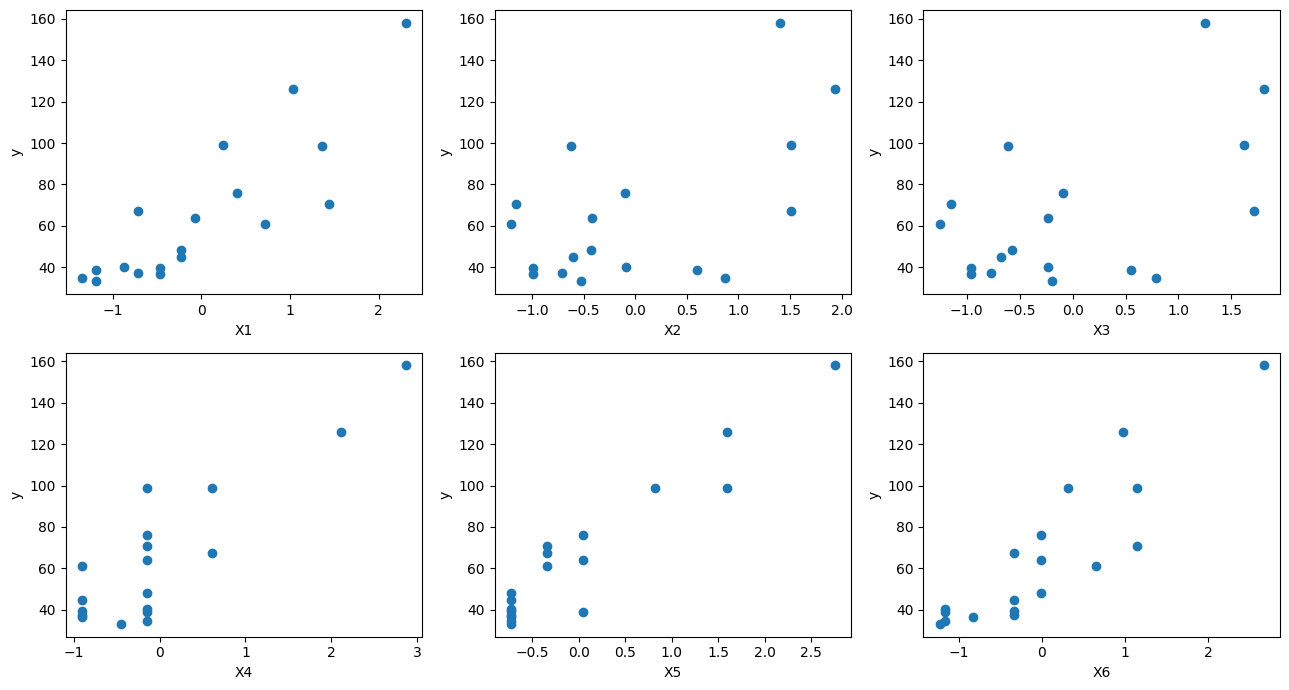

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(13, 7))

for i in range(6):
    ax[i // 3, i % 3].scatter(Xe_n[:, i+1], y)
    ax[i // 3, i % 3].set_xlabel('X{}'.format(i+1))
    ax[i // 3, i % 3].set_ylabel('y')

    # add padding between subplots
    plt.tight_layout()

3. Compute beta using the normal equation. What is the predicted benchmark result for a graphic card with the following (non-normalized) feature values?
2432; 1607; 1683; 8; 8; 256

In [7]:
beta = c.normal_equation(Xe_n, y)

new_features = np.array([2432, 1607, 1683, 8, 8, 256])
new_features_n = (new_features - mu) / sigma

new_features_n_e = np.insert(new_features_n, 0, 1)
predicted_benchmark = beta.dot(new_features_n_e)
print('Predicted bechmark result: {:.2f}'.format(predicted_benchmark))

Predicted bechmark result: 110.80


4. What is the cost when using the computed by the normal equation above?

In [8]:
cost = c.cost_function(Xe_n, y, beta)

print('Cost function: {:.2f}'.format(cost))

Cost function: 12.40


5. Gradient descent

    (a) Find (and print) hyperparameters such that you get within 1% of the final cost for the normal equation.

In [9]:
alpha_values = np.linspace(0.1, 1, 10)
N_values = np.linspace(1000, 10000, 10, dtype=int)

for alpha in alpha_values:
    for N in N_values:
        beta_gd, cost_history = c.gradient_descent(Xe_n, y, alpha, N)
        final_cost = cost_history[-1]

        if(final_cost < cost * 1.01):
            print('alpha: {:.2f}, N: {}, final cost: {:.2f}'.format(alpha, N, final_cost))
            break
    break

alpha: 0.10, N: 2000, final cost: 12.47


5. Gradient descent

    (b) What is the predicted benchmark result for the example graphic card presented above?

In [10]:
predicted_benchmark_gd = beta_gd.dot(new_features_n_e)
print('Predicted bechmark result: {:.2f}'.format(predicted_benchmark_gd))

Predicted bechmark result: 111.61
